#### This is notebook is my first attempt to browse and visualize the data in the Microsoft Spam Database.

##### Data is from Microsoft Malware Prediction Competition in Kaggle https://www.kaggle.com/c/microsoft-malware-prediction
##### Some of code is borrowed from: https://www.kaggle.com/datark1/malware-prediction-eda

##### Let's load required libraries for ready data and visualizaion.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests 
import time as t
from bs4 import BeautifulSoup

import os
# print(os.listdir("C:/Users/Shahram/Desktop/Microsoft Spam/"))

##### The train.CSV file is almost 4GB. 
* Initially, I could not read the file as a whole so read the data in small chunks to figure out the columns and its content.
* After discussing with Debadyuti, he suggested to define the Types of columns and then use the Pandas read_csv to read all the data.

In [2]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float32',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int16',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float64', # was 'float32'
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float32', # was 'float16'
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float32', # was 'float16'
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float64', # was 'float32'
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float64', # was 'float32'
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32', # was 'float16'
        'Census_InternalPrimaryDisplayResolutionVertical':      'float32', # was 'float16'
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float64', # was 'float32'
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }


train = pd.read_csv("C:/Users/Shahram/Desktop/Microsoft Spam/train.csv", dtype=dtypes)

# Ref: https://www.kaggle.com/c/microsoft-malware-prediction/discussion/76384#449402

base_url = 'https://www.microsoft.com/en-us/wdsi/definitions/antimalware-definition-release-notes?RequestVersion='
#read the data the delete it then..
#do the same for test set as well..

df = pd.read_csv('train.csv', usecols=['AvSigVersion'])
search_ver = np.asarray(list(set(df['AvSigVersion'].values)))
del df

print(len(search_ver))

saved, cnt = {}, 0

for i in search_ver:
    if cnt%200 == 0:
        print('Done till', cnt, 'out of', len(search_ver))

    page = requests.get(base_url+i)
    soup = BeautifulSoup(page.text, 'html.parser')
    try:
        saved[i] = soup.find(id='availabledate').contents[0][28:]
    except Exception:
        print('Didn\'t Find For', i)
    cnt+= 1
np.save('train_AvSigVersion.npy', saved)


In [3]:
# IMPORT TIMESTAMP DICTIONARY
datedict = np.load('C:/Users/Shahram/Desktop/Microsoft Spam/AvSigVersionTimestamps.npy', allow_pickle=True)
datedict = datedict[()]
# ADD TIMESTAMPS
train['Date'] = train['AvSigVersion'].map(datedict)
#df_test['Date'] = df_test['AvSigVersion'].map(datedict)

In [4]:
train.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,Date
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,0,NaN,0.0,0,0,0.0,0.0,10.0,0,2018-08-20 21:11:00
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,0,NaN,0.0,0,0,0.0,0.0,8.0,0,2018-03-01 22:10:00
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,0,NaN,0.0,0,0,0.0,0.0,3.0,0,2018-08-13 23:35:00
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,0,NaN,0.0,0,0,0.0,0.0,3.0,1,2018-08-17 03:01:00
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,0,0.0,0.0,0,0,0.0,0.0,1.0,1,2018-08-14 12:33:00


#### Let's see the data and its columns:
* There are almost 8.921 Million records with 83 columns. Memory usage is around 1.9 GB. the columns type is as we defined.

train.info()

train.describe()

#### We will explore the number of unique products and the Engione version in this data sets.

print ("There are", len (train.ProductName.unique().tolist()), "distinct products.", train.ProductName.unique().tolist())
print ("There are", len (train.EngineVersion.unique()), "distinct version of these products.")

### Let's look at distribution of the Devices where a malware has been detected.
#### It is clear that the there is equal distribution of devices with malware detected and device without any malware.

Zero = (train['HasDetections']==0).sum()
One  = (train['HasDetections']==1).sum()
sizes = [Zero,One]
labels = ['Zero','One']
fig1, ax1 = plt.subplots()
plt.title("Check the dsitribution of whether Devices have Detection or not", fontdict=None, loc='center', pad=None, color = "azure")
ax1.pie(sizes, labels = labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

#### Let's see which columns are binary: 
###### I wrote the code myself but got help from https://www.kaggle.com/datark1/malware-prediction-eda

In [5]:
def FindBinaryColumns (data):
    BinaryColumns = []
    for column in data.select_dtypes (include = ['int8', 'int16', 'int32', 'int16', 'float32', 'float64']):
        if ( data [column].min()) == 0 or (data[column].max() == 1):
            BinaryColumns.append (column)
    return BinaryColumns

In [6]:
BinaryColumns = FindBinaryColumns(train)

In [7]:
print ('There are', len(FindBinaryColumns(train)),'columns which are Binary.')

There are 15 columns which are Binary.


#### Let's visually look at the percentage of zeros and ones in Digital columns.

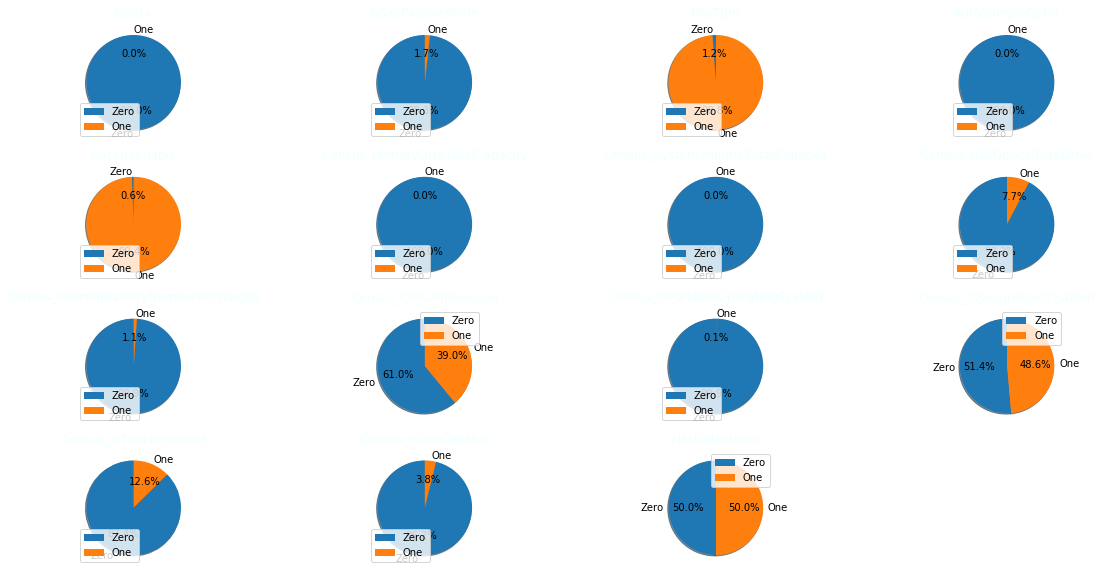

In [8]:
fig = plt.figure(figsize=(20,10))
for i, num in zip(BinaryColumns, range(1,20)):
    Zero = (train[i]==0).sum()
    One = (train[i]==1).sum()
    sizes = [Zero,One]
    labels = ['Zero','One']
    ax = fig.add_subplot(4,4,num) #fig1, ax1 = plt.subplots()
    plt.title(i, fontdict=None, loc='center', pad=None, color = "azure")
    ax.pie(sizes, labels = labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax.legend()

plt.show()

#### We should take a look to see if the columns are correlated.
##### As one can see aside from few columns ( which are in the vicinity of each other, the rest of the data are NOT Correlated.
##### Few columns are negatively correlated. (e.g.: RtpStateBitField - IsSXSPassiveMode)


#### Reference: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

In [ ]:
corr = train.corr()
plt.figure(figsize=(22,12))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#### Counting the number of Null values in columns and calculating the percentages
#### We can use this conclusion to find out which columns we can drop from our calculations.
#### As one can see, there are 7 columns with more than 50% row of null values.

In [9]:
def GenMissingValueTable (data):
    NoEmptyRows = []
    percentages = []
    ColumnType = []

    for col in train:
        ColumnType.append(data[col].dtype)
        NoEmptyRows.append(data[col].isnull().sum())
        percentages.append((data[col].isnull().sum()/train.shape[0])*100)
    
    MissingValueTable = pd.DataFrame ({'Column Name': data.columns, 'Data Type': ColumnType, 
                                   'Number of Empty Rows': NoEmptyRows,'Percentages':percentages})
    
    return MissingValueTable

In [13]:
MissingValueTable =  GenMissingValueTable (train)

In [14]:
MissingValueTable

,Column Name,Data Type,Number of Empty Rows,Percentages
0,MachineIdentifier,category,0,0.000000
1,ProductName,category,0,0.000000
2,EngineVersion,category,0,0.000000
3,AppVersion,category,0,0.000000
4,AvSigVersion,category,0,0.000000
...,...,...,...,...
79,Census_IsAlwaysOnAlwaysConnectedCapable,float16,71343,0.799676
80,Wdft_IsGamer,float16,303451,3.401352
81,Wdft_RegionIdentifier,float16,303451,3.401352
82,HasDetections,int8,0,0.000000


# Graph Missing Value Percentages
plt.figure(figsize=(20,10))
plt.title("Percentage of Null counts in columns", fontdict=None, loc='center', pad=None)
plt.xticks(rotation='vertical')
plt.bar(x = MissingValueTable['Column Name'], height = MissingValueTable['Percentages'])
plt.show()

### Let's group infected machines by the "platform".
#### Windows 10 is the major infected platform with more than 4 million machines infected.

group = ['Platform', 'HasDetections']
test = train.groupby(group).size().sort_index()

Test = pd.DataFrame (test)

# Graph Missing Value Percentages
plt.figure(figsize=(10,6))
plt.title("Machine counts", fontdict=None, loc='center', pad=None)
plt.xticks(rotation='vertical')
plt.ylabel("Number of machines") #ax.set_ylabel('Probability density')
sns.barplot(x = test.index, y = Test[0])
plt.show()

### Let's group infected machines by Form Factor.

#### It is clear that Notebooks are majorly hit by malwares and then desktops and convertibles stand second and third respectively.

group = ['Census_MDC2FormFactor', 'HasDetections']
test = train.groupby(group).size().sort_index()

Test = pd.DataFrame (test)

# Graph Missing Value Percentages
plt.figure(figsize=(10,6))
plt.title("Machine counts by Form Factor", fontdict=None, loc='center', pad=None)
plt.xticks(rotation='vertical')
plt.ylabel("Number of machines") 
sns.barplot(x = test.index, y = Test[0])
plt.show()

### Let's group infected machines by whether they are a Gamer or not.
#### It is clear that the gamer machine (wehether infected or not) are more than half of the non-gamers. Clearly, among the gamer machine infection is more (probable).

group = ['Wdft_IsGamer', 'HasDetections']
test = train.groupby(group).size().sort_index()

Test = pd.DataFrame (test)

# Graph Missing Value Percentages
plt.figure(figsize=(10,6))
plt.title("Machine counts by whether it is a gaming machine", fontdict=None, loc='center', pad=None)
plt.xticks(rotation='vertical')
plt.ylabel("Number of machines") 
sns.barplot(x = test.index, y = Test[0])
plt.show()

BinaryColumns

CategoryColumns = train.select_dtypes (include = ['category']).columns
# CategoryColumns
BinaryColumns.extend(CategoryColumns)
CategoryColumns
# BinaryColumns

ColumnsExcluded = train.columns.difference(BinaryColumns)

fig = plt.figure(figsize=(20,10))
for i, num in zip(ColumnsExcluded, range(1,30)):
    
    ax = fig.add_subplot(5,6,num) #fig1, ax1 = plt.subplots()
    plt.title(i, fontdict=None, loc='center', pad=None, color = "azure")
    sns.distplot(train[i].dropna())
    #ax.legend()

plt.show()

### Summary:
* We used the data in Microsoft Malware database.
* The data contain around 8.92 million record and 83 column. Fifteen columns are binary. We made a pie chart to see the distributoion of the Binary columns.
* The Target column which is HasDetectiosn is equally distributed.
* We graphed the heatmap of correlation of columns and saw that few columns are correlted. (Two columns are strongly negatively correlated and a few are positivley correlated.)
* we also grahphed the malware infected devices by platform and Form Factor and Windows versio.
* Windos 10 and laptops are the most infected machines.
* We also graphed the histogram of the rmeainning columns to see the distribution of the data.
* Few columns (around 7) have more than 50% of their data mssining (Null value) and hence might be a good idea to ignore them in the data engineering. We ideate that the other columns with less missing values can be filled with mean or median of the column.


### The rest of this note book is related to Feature Engineering.

#### I am going to drop the columns with more than 10% missing vlaues which are around 9 or 10 columns.

In [15]:
print ("There are ", (MissingValueTable['Percentages']>=10).sum(), "columns with more than 10 % of rows with missing values.")
MissingValueTable [(MissingValueTable['Percentages']>=10)]

There are  9 columns with more than 10 % of rows with missing values.


,Column Name,Data Type,Number of Empty Rows,Percentages
8,DefaultBrowsersIdentifier,float32,8488045,95.141637
15,OrganizationIdentifier,float16,2751518,30.841487
28,PuaMode,category,8919174,99.974119
31,SmartScreen,category,3177011,35.610795
41,Census_ProcessorClass,category,8884852,99.589407
52,Census_InternalBatteryType,category,6338429,71.046809
68,Census_IsFlightingInternal,float16,7408759,83.044030
71,Census_ThresholdOptIn,float16,5667325,63.524472
75,Census_IsWIMBootEnabled,float16,5659703,63.439038


In [16]:
train = train.drop(MissingValueTable [(MissingValueTable['Percentages']>=10)]['Column Name'], axis = 1)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 75 columns):
MachineIdentifier                                    category
ProductName                                          category
EngineVersion                                        category
AppVersion                                           category
AvSigVersion                                         category
IsBeta                                               int8
RtpStateBitfield                                     float16
IsSxsPassiveMode                                     int8
AVProductStatesIdentifier                            float32
AVProductsInstalled                                  float16
AVProductsEnabled                                    float16
HasTpm                                               int8
CountryIdentifier                                    int16
CityIdentifier                                       float32
GeoNameIdentifier                      

#### There are 35 columns with between 0 to 10 % rows missing.

In [18]:
MissingValueTable [(MissingValueTable['Percentages']<=10) & (MissingValueTable['Percentages']>0)].count()

Column Name             36
Data Type               36
Number of Empty Rows    36
Percentages             36
dtype: int64

In [21]:
# MissingValueTable [(MissingValueTable['Percentages']<=10) & (MissingValueTable['Percentages']>0)]

In [22]:
ColumnsWMissingValue = MissingValueTable [(MissingValueTable['Percentages']<=10) & (MissingValueTable['Percentages']>0)] #['Column Name']

In [23]:
ColumnsWMissingValue

,Column Name,Data Type,Number of Empty Rows,Percentages
6,RtpStateBitfield,float16,32318,0.362249
9,AVProductStatesIdentifier,float32,36221,0.405998
10,AVProductsInstalled,float16,36221,0.405998
11,AVProductsEnabled,float16,36221,0.405998
14,CityIdentifier,float32,325409,3.647477
16,GeoNameIdentifier,float16,213,0.002387
24,OsBuildLab,category,21,0.000235
26,IsProtected,float16,36044,0.404014
29,SMode,float16,537759,6.027686
30,IeVerIdentifier,float16,58894,0.660137


#### List of Categorical columns with between 0 - 10 percent missing rows.

In [24]:
ColumnsWMissingValue.loc [ColumnsWMissingValue['Data Type'] =='category']['Column Name'].tolist()

['OsBuildLab',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName']

### Since we cannot impute text at the moment, We are going to remove any rows with missing value in the categorical columns and then take a 1 or 2% sample from the rest of the dataframe.

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 75 columns):
MachineIdentifier                                    category
ProductName                                          category
EngineVersion                                        category
AppVersion                                           category
AvSigVersion                                         category
IsBeta                                               int8
RtpStateBitfield                                     float16
IsSxsPassiveMode                                     int8
AVProductStatesIdentifier                            float32
AVProductsInstalled                                  float16
AVProductsEnabled                                    float16
HasTpm                                               int8
CountryIdentifier                                    int16
CityIdentifier                                       float32
GeoNameIdentifier                      

In [26]:
train [ColumnsWMissingValue.loc [ColumnsWMissingValue['Data Type'] =='category']['Column Name'].tolist()].isna().sum()

OsBuildLab                         21
Census_PrimaryDiskTypeName      12844
Census_ChassisTypeName            623
Census_PowerPlatformRoleName       55
dtype: int64

In [27]:
#ColumnsWMissingValue.loc [ColumnsWMissingValue['Data Type'] =='category']['Column Name'].tolist()
train1 = train.dropna (subset = ColumnsWMissingValue.loc [ColumnsWMissingValue['Data Type'] =='category']['Column Name'].tolist() , axis = 0)

In [28]:
train1 [ColumnsWMissingValue.loc [ColumnsWMissingValue['Data Type'] =='category']['Column Name'].tolist()].isna().sum()

OsBuildLab                      0
Census_PrimaryDiskTypeName      0
Census_ChassisTypeName          0
Census_PowerPlatformRoleName    0
dtype: int64

In [29]:
train1 [ColumnsWMissingValue.loc [ColumnsWMissingValue['Data Type'] =='category']['Column Name'].tolist()]

,OsBuildLab,Census_PrimaryDiskTypeName,Census_ChassisTypeName,Census_PowerPlatformRoleName
0,17134.1.amd64fre.rs4_release.180410-1804,HDD,Desktop,Desktop
1,17134.1.amd64fre.rs4_release.180410-1804,HDD,Notebook,Mobile
2,17134.1.amd64fre.rs4_release.180410-1804,SSD,Desktop,Desktop
3,17134.1.amd64fre.rs4_release.180410-1804,UNKNOWN,MiniTower,Desktop
4,17134.1.amd64fre.rs4_release.180410-1804,HDD,Portable,Mobile
...,...,...,...,...
8921478,16299.431.amd64fre.rs3_release_svc_escrow.1805...,HDD,Notebook,Mobile
8921479,10586.672.x86fre.th2_release_sec.161024-1825,Unspecified,SpaceSaving,SOHOServer
8921480,16299.15.amd64fre.rs3_release.170928-1534,SSD,Notebook,Mobile
8921481,15063.0.amd64fre.rs2_release.170317-1834,HDD,Notebook,Mobile


In [30]:
train2 = train1.sample(frac=0.02,random_state=200) #random state is a seed value

#### I will be imputating Using Multivariate Imputation by Chained Equation.
* Ref: https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

In [31]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178167 entries, 3253398 to 7633133
Data columns (total 75 columns):
MachineIdentifier                                    178167 non-null category
ProductName                                          178167 non-null category
EngineVersion                                        178167 non-null category
AppVersion                                           178167 non-null category
AvSigVersion                                         178167 non-null category
IsBeta                                               178167 non-null int8
RtpStateBitfield                                     177538 non-null float16
IsSxsPassiveMode                                     178167 non-null int8
AVProductStatesIdentifier                            177456 non-null float32
AVProductsInstalled                                  177456 non-null float16
AVProductsEnabled                                    177456 non-null float16
HasTpm                              

In [32]:
train2.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,178167.000000,177538.0,178167.000000,177456.000000,177456.0,177456.0,178167.000000,178167.000000,171587.000000,178162.0,...,174521.0,174947.000000,178167.000000,177858.000000,178167.000000,178167.000000,176720.000000,172061.000000,172061.0,178167.000000
mean,0.000006,NaN,0.017388,47856.285156,NaN,NaN,0.989106,108.244748,81309.937500,NaN,...,NaN,32947.730469,0.488205,0.006771,0.125949,0.038514,0.057800,0.283691,NaN,0.500081
std,0.002369,0.0,0.130713,13970.840820,0.0,0.0,0.103806,63.115303,48950.941406,NaN,...,NaN,21178.927734,0.499862,0.082031,0.331793,0.192435,0.233643,0.450928,0.0,0.500001
min,0.000000,0.0,0.000000,16.000000,0.0,0.0,0.000000,1.000000,12.000000,1.0,...,8.0,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,7.0,0.000000,49480.000000,1.0,1.0,1.000000,51.000000,36825.000000,89.0,...,142.0,13154.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,0.000000
50%,0.000000,7.0,0.000000,53447.000000,1.0,1.0,1.000000,97.000000,82373.000000,181.0,...,500.0,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.0,1.000000
75%,0.000000,7.0,0.000000,53447.000000,2.0,1.0,1.000000,162.000000,123931.000000,267.0,...,556.0,52353.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.0,1.000000
max,1.000000,35.0,1.000000,70507.000000,6.0,4.0,1.000000,222.000000,167962.000000,296.0,...,1084.0,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.0,1.000000


In [33]:
ColumnsWMissingValue['Column Name']

6                                      RtpStateBitfield
9                             AVProductStatesIdentifier
10                                  AVProductsInstalled
11                                    AVProductsEnabled
14                                       CityIdentifier
16                                    GeoNameIdentifier
24                                           OsBuildLab
26                                          IsProtected
29                                                SMode
30                                      IeVerIdentifier
32                                             Firewall
33                                         UacLuaenable
36                             Census_OEMNameIdentifier
37                            Census_OEMModelIdentifier
38                            Census_ProcessorCoreCount
39               Census_ProcessorManufacturerIdentifier
40                      Census_ProcessorModelIdentifier
42                      Census_PrimaryDiskTotalC

In [34]:
NumColumnWMissingValue1 = train2 [ColumnsWMissingValue['Column Name']].select_dtypes(exclude='category')

In [35]:
NumColumnWMissingValue1 = NumColumnWMissingValue1.drop("Date", axis =1)

In [36]:
NumColumnWMissingValue1.columns.tolist()

['RtpStateBitfield',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CityIdentifier',
 'GeoNameIdentifier',
 'IsProtected',
 'SMode',
 'IeVerIdentifier',
 'Firewall',
 'UacLuaenable',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSInstallLanguageIdentifier',
 'Census_IsFlightsDisabled',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Census_IsVirtualDevice',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer',
 'Wdft_RegionIdentifier']

#Tried Multivariate Imputation but found it to be slow 
from impyute.imputation.cs import mice
imputed_training = mice(NumColumnWMissingValue1.values)

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean') 
imp_mean.fit(NumColumnWMissingValue)
imputed_train_df = imp_mean.transform(NumColumnWMissingValue)

dataset = pd.DataFrame(imputed_training)

dataset.columns = NumColumnWMissingValue1.columns.tolist()

dataset.describe()

In [37]:
NumColumnWMissingValue1.describe()

,RtpStateBitfield,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,CityIdentifier,GeoNameIdentifier,IsProtected,SMode,IeVerIdentifier,Firewall,...,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSInstallLanguageIdentifier,Census_IsFlightsDisabled,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsVirtualDevice,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
count,177538.0,177456.000000,177456.0,177456.0,171587.000000,178162.0,177463.0,167411.000000,177024.0,176507.0,...,177307.000000,1.728950e+05,177029.0,175220.000000,174521.0,174947.000000,177858.000000,176720.000000,172061.000000,172061.0
mean,NaN,47856.285156,NaN,NaN,81309.937500,NaN,NaN,0.000567,NaN,NaN,...,897.702454,1.121469e+09,NaN,0.000006,NaN,32947.730469,0.006771,0.057800,0.283691,NaN
std,0.0,13970.840820,0.0,0.0,48950.941406,NaN,0.0,0.023819,NaN,0.0,...,214.455887,1.886531e+09,0.0,0.002392,NaN,21178.927734,0.082031,0.233643,0.450928,0.0
min,0.0,16.000000,0.0,0.0,12.000000,1.0,0.0,0.000000,9.0,0.0,...,-1.000000,0.000000e+00,1.0,0.000000,8.0,40.000000,0.000000,0.000000,0.000000,1.0
25%,7.0,49480.000000,1.0,1.0,36825.000000,89.0,1.0,0.000000,111.0,1.0,...,768.000000,0.000000e+00,8.0,0.000000,142.0,13154.000000,0.000000,0.000000,0.000000,3.0
50%,7.0,53447.000000,1.0,1.0,82373.000000,181.0,1.0,0.000000,117.0,1.0,...,768.000000,0.000000e+00,9.0,0.000000,500.0,33066.000000,0.000000,0.000000,0.000000,10.0
75%,7.0,53447.000000,2.0,1.0,123931.000000,267.0,1.0,0.000000,137.0,1.0,...,1080.000000,4.294967e+09,20.0,0.000000,556.0,52353.000000,0.000000,0.000000,1.000000,11.0
max,35.0,70507.000000,6.0,4.0,167962.000000,296.0,1.0,1.000000,429.0,1.0,...,3840.000000,4.294967e+09,39.0,1.000000,1084.0,72091.000000,1.000000,1.000000,1.000000,15.0


In [39]:
# BinaryColumns

for col in NumColumnWMissingValue1.columns.tolist():
    if col in BinaryColumns:
        print (col, 'Binary')
        print (train2[col].mode())
    else:
        
        print ('Not in Binary')

In [40]:
#train2 ['Census_PrimaryDiskTotalCapacity'].mode()

0    476940.0
dtype: float64

In [41]:
for col in NumColumnWMissingValue1.columns.tolist():
    if col in BinaryColumns:
        train2[col].fillna(train2[col].mode(), inplace = True)
    else:
        train2[col] =  train2[col].astype (dtype = 'float32')
        train2[col].fillna(train2[col].mean(), inplace = True)

train2['RtpStateBitfield'].fillna(train2['RtpStateBitfield'].mean(), inplace=True)

In [42]:
train2.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,178167.000000,178167.000000,178167.000000,178167.000000,178167.000000,178167.000000,178167.000000,178167.000000,178167.000000,178167.000000,...,178167.000000,178167.000000,178167.000000,178167.000000,178167.000000,178167.000000,178167.000000,178167.000000,178167.000000,178167.000000
mean,0.000006,6.844771,0.017388,47855.582031,1.326812,1.020668,0.989106,108.244748,81305.015625,169.710815,...,403.420288,32947.464844,0.488205,0.006769,0.125949,0.038514,0.057877,0.283812,7.877197,0.500081
std,0.002369,1.028274,0.130713,13943.035156,0.522086,0.167220,0.103806,63.115303,48038.171875,89.383957,...,219.208679,20986.695312,0.499862,0.081946,0.331793,0.192435,0.232517,0.442926,4.465311,0.500001
min,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,...,8.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,37912.000000,89.000000,...,142.000000,13272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.000000,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,81309.937500,181.000000,...,486.000000,33054.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.000000,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,121270.000000,267.000000,...,556.000000,52090.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,1.000000,35.000000,1.000000,70507.000000,6.000000,4.000000,1.000000,222.000000,167962.000000,296.000000,...,1084.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


Let digitize the categorical columns with one hot encoder

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 75 columns):
MachineIdentifier                                    category
ProductName                                          category
EngineVersion                                        category
AppVersion                                           category
AvSigVersion                                         category
IsBeta                                               int8
RtpStateBitfield                                     float16
IsSxsPassiveMode                                     int8
AVProductStatesIdentifier                            float32
AVProductsInstalled                                  float16
AVProductsEnabled                                    float16
HasTpm                                               int8
CountryIdentifier                                    int16
CityIdentifier                                       float32
GeoNameIdentifier                      

In [36]:
train2.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,Date
3253398,5d56f42df1e20c73fd2af28e2f0533d2,win8defender,1.1.15000.2,4.18.1806.18062,1.271.654.0,0,7.0,0,47238.0,2.0,...,8849.0,1,0.0,0,0,0.0,0.0,5.0,0,2018-07-07 06:01:00
7155189,cd4aa87bafe94efa1b8eda294156d6c6,win8defender,1.1.15200.1,4.18.1807.18075,1.275.948.0,0,7.0,0,51954.0,2.0,...,33111.0,1,0.0,0,0,0.0,1.0,10.0,1,2018-09-08 15:36:00
6426857,b8759bef96cd23eba31b9726edc5e59f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,47238.0,2.0,...,2115.0,1,0.0,1,0,0.0,1.0,13.0,1,2018-08-17 03:01:00
8623970,f776046294250d365fec538c7ec7adbf,win8defender,1.1.15100.1,4.18.1807.18075,1.273.738.0,0,7.0,0,53447.0,1.0,...,70130.0,1,0.0,0,0,0.0,1.0,11.0,1,2018-08-02 16:51:00
1667780,2fdedc0ccb5fbce131bdd99033ad8296,win8defender,1.1.15100.1,4.9.10586.916,1.273.1644.0,0,7.0,0,53447.0,1.0,...,9125.0,1,0.0,0,0,0.0,0.0,10.0,0,2018-08-19 02:59:00


In [43]:
train2.select_dtypes(include='category').columns.tolist()

['MachineIdentifier',
 'ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [44]:
train_columns = train2.select_dtypes(include='category').columns.tolist()

In [45]:
Categorical_Columns = ['ProductName', 'Platform', 'Processor', 'Census_OSArchitecture',
                       'Census_FlightRing','Census_GenuineStateName']

In [46]:
Drop_columns = [x for x in train_columns if x not in Categorical_Columns]
print (Drop_columns)

['MachineIdentifier', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'OsVer', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'Census_MDC2FormFactor', 'Census_DeviceFamily', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'Census_OSVersion', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_ActivationChannel']


In [47]:
train2 = train2.drop (Drop_columns, axis = 1)

In [48]:
train2[Categorical_Columns]

,ProductName,Platform,Processor,Census_OSArchitecture,Census_FlightRing,Census_GenuineStateName
3253398,win8defender,windows10,x64,amd64,Unknown,IS_GENUINE
7155189,win8defender,windows10,x64,amd64,Retail,IS_GENUINE
6426857,win8defender,windows10,x64,amd64,Retail,IS_GENUINE
8623970,win8defender,windows10,x64,amd64,Retail,INVALID_LICENSE
1667780,win8defender,windows10,x64,amd64,Retail,IS_GENUINE
...,...,...,...,...,...,...
3105907,win8defender,windows10,x64,amd64,Retail,IS_GENUINE
9870,win8defender,windows10,x64,amd64,Retail,IS_GENUINE
7956196,win8defender,windows10,x64,amd64,Retail,INVALID_LICENSE
455464,win8defender,windows10,x64,amd64,Retail,IS_GENUINE


In [49]:
train2[Categorical_Columns] = train2[Categorical_Columns].astype ('category')

In [50]:
train2[Categorical_Columns].isna().sum()

ProductName                0
Platform                   0
Processor                  0
Census_OSArchitecture      0
Census_FlightRing          0
Census_GenuineStateName    0
dtype: int64

In [51]:
Categorical_Columns

['ProductName',
 'Platform',
 'Processor',
 'Census_OSArchitecture',
 'Census_FlightRing',
 'Census_GenuineStateName']

In [52]:
train3 = pd.get_dummies (train2[Categorical_Columns])

In [53]:
train3

,ProductName_mse,ProductName_win8defender,ProductName_mseprerelease,ProductName_windowsintune,ProductName_fep,ProductName_scep,Platform_windows10,Platform_windows2016,Platform_windows7,Platform_windows8,...,Census_FlightRing_WIF,Census_FlightRing_WIS,Census_FlightRing_OSG,Census_FlightRing_Canary,Census_FlightRing_Invalid,Census_GenuineStateName_INVALID_LICENSE,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN,Census_GenuineStateName_TAMPERED
3253398,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7155189,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6426857,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8623970,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1667780,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105907,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9870,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7956196,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
455464,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [54]:
train2 = train2.drop (Categorical_Columns, axis =1)

In [55]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178167 entries, 3253398 to 7633133
Data columns (total 49 columns):
IsBeta                                               178167 non-null int8
RtpStateBitfield                                     178167 non-null float32
IsSxsPassiveMode                                     178167 non-null int8
AVProductStatesIdentifier                            178167 non-null float32
AVProductsInstalled                                  178167 non-null float32
AVProductsEnabled                                    178167 non-null float32
HasTpm                                               178167 non-null int8
CountryIdentifier                                    178167 non-null int16
CityIdentifier                                       178167 non-null float32
GeoNameIdentifier                                    178167 non-null float32
LocaleEnglishNameIdentifier                          178167 non-null int16
OsBuild                                         

In [56]:
train4 = pd.concat([train2, train3], axis =1)

In [57]:
train4.head()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,...,Census_FlightRing_WIF,Census_FlightRing_WIS,Census_FlightRing_OSG,Census_FlightRing_Canary,Census_FlightRing_Invalid,Census_GenuineStateName_INVALID_LICENSE,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN,Census_GenuineStateName_TAMPERED
3253398,0,7.0,0,47238.0,2.0,1.0,1,66,7373.0,89.0,...,0,0,0,0,0,0,1,0,0,0
7155189,0,7.0,0,51954.0,2.0,1.0,1,41,130775.0,52.0,...,0,0,0,0,0,0,1,0,0,0
6426857,0,7.0,0,47238.0,2.0,1.0,1,207,146533.0,277.0,...,0,0,0,0,0,0,1,0,0,0
8623970,0,7.0,0,53447.0,1.0,1.0,1,201,66202.0,267.0,...,0,0,0,0,0,1,0,0,0,0
1667780,0,7.0,0,53447.0,1.0,1.0,1,29,145614.0,35.0,...,0,0,0,0,0,0,1,0,0,0


In [49]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(train4, test_size=0.3)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
features = train4.loc[:, train4.columns != 'HasDetections'].columns.tolist()

In [51]:
y_train = train['HasDetections']
X_train = train[features]

In [52]:
y_test = test['HasDetections']
X_test = test[features]

### Ref: https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7

In [53]:
import xgboost as xgb

In [54]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

C:\Users\Shahram\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Shahram\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [68]:
param = {
    'eta': 0.3, 
    'max_depth': 10,  
    'objective': 'multi:softprob',  
    'num_class': 5} 

steps = 20  # The number of training iterations

In [69]:
model = xgb.train(param, D_train, steps)

In [70]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.60936054322367
Recall = 0.6076987003749696
Accuracy = 0.6075096817646068


#### Ref: https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

In [ ]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 100
params['min_data'] = 50
params['max_depth'] = 100
clf = lgb.train(params, d_train, 100)

In [ ]:
#Prediction
y_pred=clf.predict(X_test)
#convert into binary values
for i in range(0,99):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)

### Trying Logisitic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
lr = LogisticRegression(penalty = 'l1', C = 10,random_state = 1)

* Apply logistic regression on the split train/test dataset

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
y_predict = lr.predict(X_test)

* Compute your model’s accuracy using accuracy_score

In [ ]:
round(accuracy_score(y_test,y_predict),3)